In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

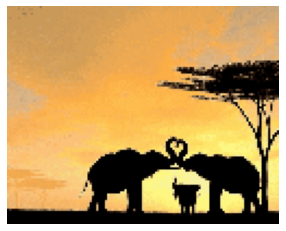

In [2]:
im=cv2.imread(r"image.png")
im=cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
plt.axis("off")
plt.imshow(im)
plt.show()

In [3]:
im.shape

(100, 125, 3)

In [4]:
all_pixel=im.reshape((-1,3))
all_pixel.shape

(12500, 3)

In [5]:
x=all_pixel

In [6]:
k=4
clusters={}
label=np.zeros(12500,dtype='uint8')

In [7]:
def plus_plus(ds, k, random_state=42):
    """
    Create cluster centroids using the k-means++ algorithm.
    Parameters
    ----------
    ds : numpy array
        The dataset to be used for centroid initialization.
    k : int
        The desired number of clusters for which centroids are required.
    Returns
    -------
    centroids : numpy array
        Collection of k centroids as a numpy array.
    Inspiration from here: https://stackoverflow.com/questions/5466323/how-could-one-implement-the-k-means-algorithm
    """

    np.random.seed(random_state)
    centroids = [ds[0]]

    for _ in range(1, k):
        dist_sq = np.array([min([np.inner(c-x,c-x) for c in centroids]) for x in ds])
        probs = dist_sq/dist_sq.sum()
        cumulative_probs = probs.cumsum()
        r = np.random.rand()
        
        for j, p in enumerate(cumulative_probs):
            if r < p:
                i = j
                break
        
        centroids.append(ds[i])

    return np.array(centroids)
cen=plus_plus(x,4)

In [8]:
for i in range(k):
    points=[]
    cluster={
        'points':points,
        'centre':cen[i]
    }
    clusters[i]=cluster

In [9]:
def dist(x,y):
    return np.sqrt(np.sum((x-y)**2))
def assignpointstocluster(clusters):
    for i in range(x.shape[0]):
        new_point=x[i]
        dis=[]
        for j in range(4):
            d=dist(new_point,clusters[j]['centre'])
            dis.append(d)
        min_dis=np.argmin(dis)
        label[i]=min_dis
        clusters[min_dis]['points'].append(new_point)

In [10]:
def updatecentre(clusters):
    for i in range(4):
        pts=np.array(clusters[i]['points'])
        if pts.shape[0]>0:
            new_centre=pts.mean(axis=0)
            clusters[i]['centre']=new_centre
            clusters[i]['points']=[]

In [11]:
for i in range(7):
    assignpointstocluster(clusters)
    updatecentre(clusters)

In [12]:
centers=[]
for i in range(4):
    centers.append(clusters[i]['centre'])

In [13]:
centers

[array([244.36357404, 178.60397623,  86.28107861]),
 array([207.07537879, 159.84583333,  99.00151515]),
 array([7.11538462, 4.32412587, 2.58566434]),
 array([250.50609756, 217.44245427, 120.89634146])]

In [14]:
centers=np.array(centers,dtype='uint8')
centers

array([[244, 178,  86],
       [207, 159,  99],
       [  7,   4,   2],
       [250, 217, 120]], dtype=uint8)

In [15]:
label

array([1, 1, 1, ..., 2, 2, 2], dtype=uint8)

# PLOTING DOMINANT COLOR

[244 178  86]
[207 159  99]
[7 4 2]
[250 217 120]


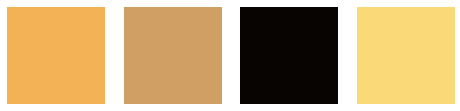

In [16]:
i1=1
plt.figure(figsize=(8,4))
for i in centers:
    plt.subplot(1,4,i1)
    plt.axis("off")
    i1=i1+1
    img=np.zeros((100,100,3),dtype='uint8')
    print(i)
    img[:,:,:]=i
    plt.imshow(img)
plt.show()

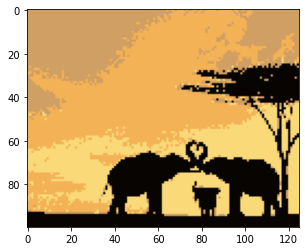

In [17]:
elephant=[]
for i in range(all_pixel.shape[0]):
    all_pixel[i]=centers[label[i]]
    if label[i]==2:
        elephant.append(i)
plt.imshow(all_pixel.reshape((100,125, 3)))
plt.show()

# experiment cropping part of image with black color

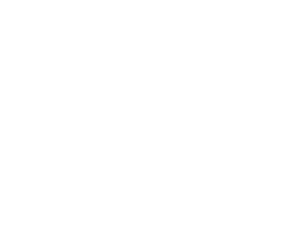

In [18]:
img1=np.full((100,125,3),255,dtype='uint8')
plt.axis("off")
plt.imshow(img1)
plt.show()

In [19]:
all_pixel_white=img1.reshape((-1,3))
all_pixel_white.shape

(12500, 3)

In [20]:
for i in elephant:
    all_pixel_white[i]=10,7,7

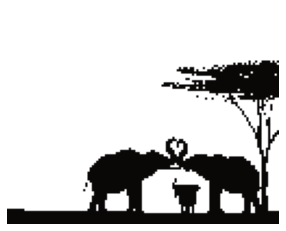

In [21]:
plt.axis("off")
plt.imshow(all_pixel_white.reshape((100,125,3)))
plt.show()

In [22]:
all_pixel_white

array([[255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       ...,
       [ 10,   7,   7],
       [ 10,   7,   7],
       [ 10,   7,   7]], dtype=uint8)

In [23]:
all_pixel

array([[207, 159,  99],
       [207, 159,  99],
       [207, 159,  99],
       ...,
       [  7,   4,   2],
       [  7,   4,   2],
       [  7,   4,   2]], dtype=uint8)